#### SHAP CODE to CHOOSE VARIABLE IMPORTANCE

https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137 

In [73]:
# %% Imports
from utils import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap
import pandas as pd
import numpy as np

In [74]:
df = pd.read_csv(r'C:\Users\MJAR0016\Desktop\data_4_SHAP.csv')
df.head()

,Video_Name,Type,Openface_gaze_child,Fer_emotions_child,hand_left_x_adult,hand_left_y_adult,hand_right_x_adult,hand_right_y_adult,head_x_adult,head_y_adult,hand_left_x_child,hand_left_y_child,hand_right_x_child,hand_right_y_child,head_x_child,head_y_child,Total_video_red_body,Total_video_red_head,Type_enc
0,2023_CFLH,Control,0.367,0.001799,0.127726,0.048561,0.122745,0.050315,0.099885,0.034279,0.200317,0.096824,0.082856,0.097622,0.182887,0.057123,0.000000,0.000000,0
1,2025_SRF,Control,0.374,0.203160,0.247773,0.211057,0.218768,0.214073,0.198482,0.149894,0.049753,0.028589,0.037262,0.029972,0.048221,0.026176,0.000099,0.000000,0
2,2048_VMY,Control,0.485,0.007679,0.149614,0.108114,0.176780,0.087354,0.124731,0.054382,0.153328,0.101382,0.054481,0.105798,0.130008,0.073737,0.000192,0.000048,0
3,2053_HCK,Control,0.377,0.002789,0.067173,0.034553,0.072553,0.032087,0.062592,0.033870,0.115682,0.067241,0.088655,0.070538,0.116464,0.054508,0.000000,0.000000,0
4,2055_CP,Control,0.329,0.022569,0.215708,0.257767,0.234966,0.258505,0.185188,0.198978,0.197849,0.152850,0.095717,0.149772,0.166600,0.102052,0.000000,0.000000,0


In [75]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

with open(r'C:\Users\MJAR0016\Desktop\data_4_SHAP.csv') as f:
 X = pd.read_csv(f,usecols=['Type_enc','Openface_gaze_child' ,'Fer_emotions_child', 'hand_left_x_adult', 'hand_left_y_adult','hand_right_x_adult','hand_right_y_adult','head_x_adult','head_y_adult','hand_left_x_child','hand_left_y_child','hand_right_x_child','hand_right_y_child','head_x_child','head_y_child'])
f.close()
X.head(10)
y = df['Total_video_red_body']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
X.head()

,Openface_gaze_child,Fer_emotions_child,hand_left_x_adult,hand_left_y_adult,hand_right_x_adult,hand_right_y_adult,head_x_adult,head_y_adult,hand_left_x_child,hand_left_y_child,hand_right_x_child,hand_right_y_child,head_x_child,head_y_child,Type_enc
0,0.367,0.001799,0.127726,0.048561,0.122745,0.050315,0.099885,0.034279,0.200317,0.096824,0.082856,0.097622,0.182887,0.057123,0
1,0.374,0.203160,0.247773,0.211057,0.218768,0.214073,0.198482,0.149894,0.049753,0.028589,0.037262,0.029972,0.048221,0.026176,0
2,0.485,0.007679,0.149614,0.108114,0.176780,0.087354,0.124731,0.054382,0.153328,0.101382,0.054481,0.105798,0.130008,0.073737,0
3,0.377,0.002789,0.067173,0.034553,0.072553,0.032087,0.062592,0.033870,0.115682,0.067241,0.088655,0.070538,0.116464,0.054508,0
4,0.329,0.022569,0.215708,0.257767,0.234966,0.258505,0.185188,0.198978,0.197849,0.152850,0.095717,0.149772,0.166600,0.102052,0


In [77]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

In [14]:
import xgboost

warnings.filterwarnings('ignore')
# Evaluate SHAP values
shap_values = explainer.shap_values(X)

NameError: name 'warnings' is not defined

In [7]:
pip install warnings

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


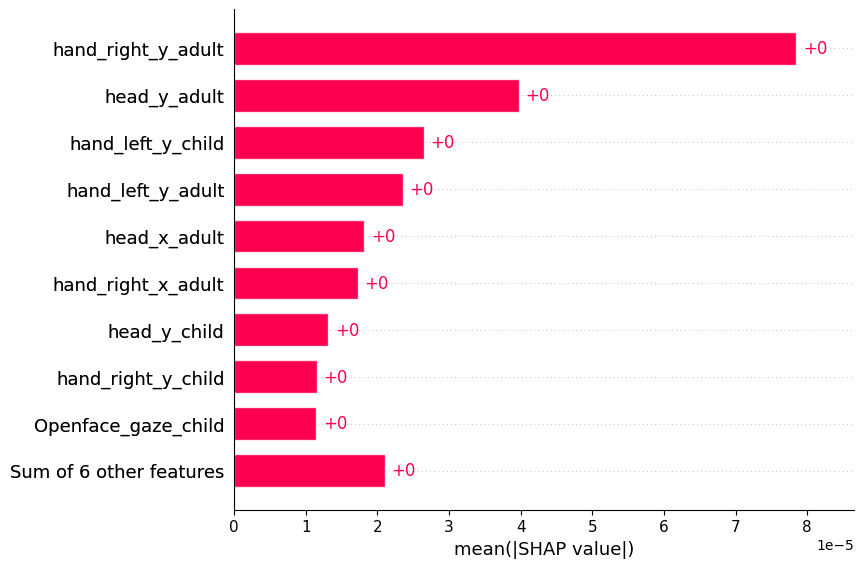

In [78]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


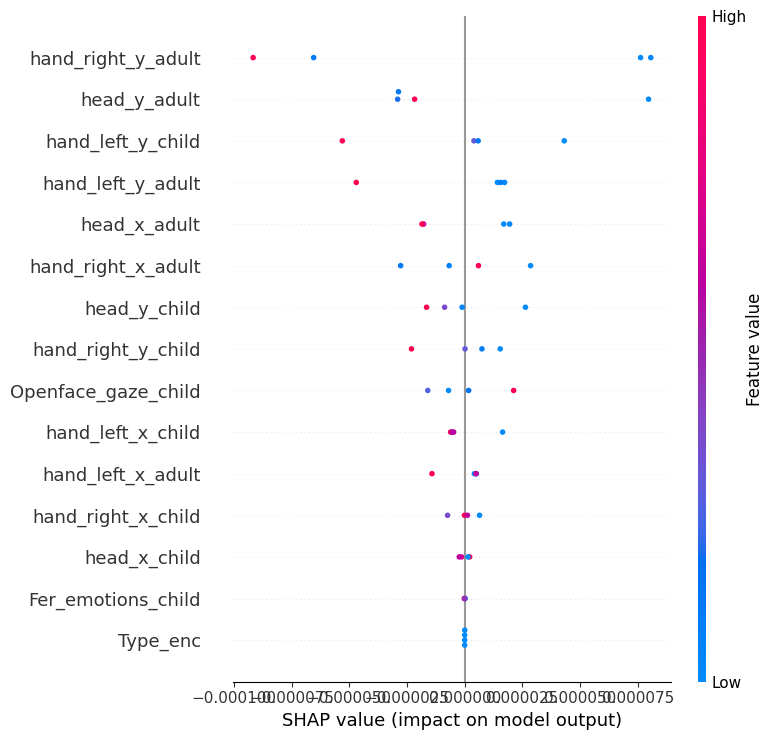

In [79]:
shap.summary_plot(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


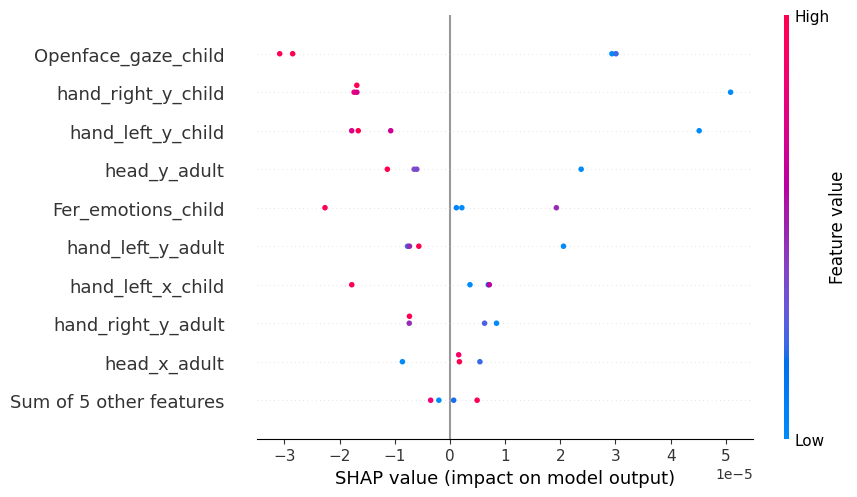

In [22]:
shap.plots.beeswarm(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


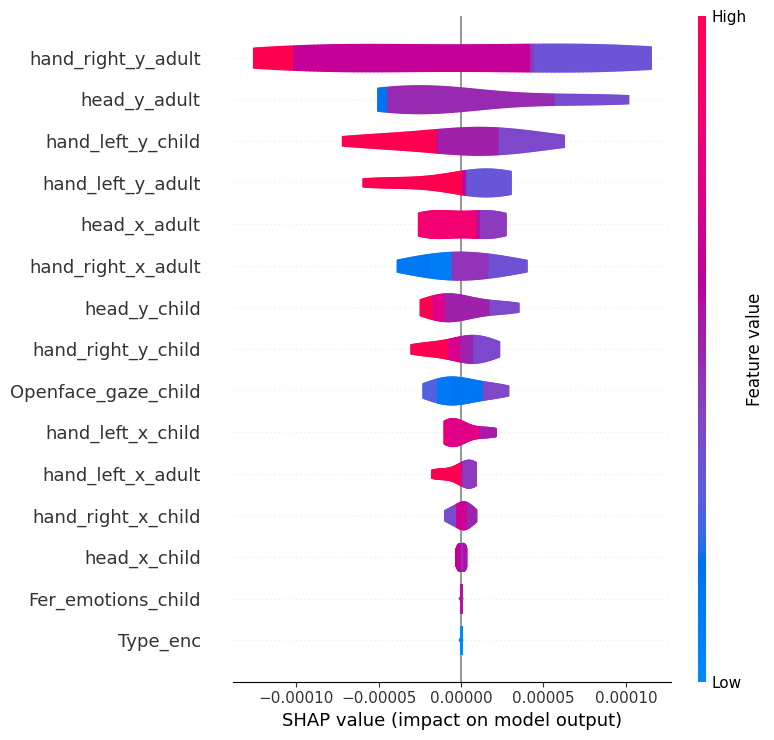

In [80]:
shap.summary_plot(shap_values, plot_type='violin')

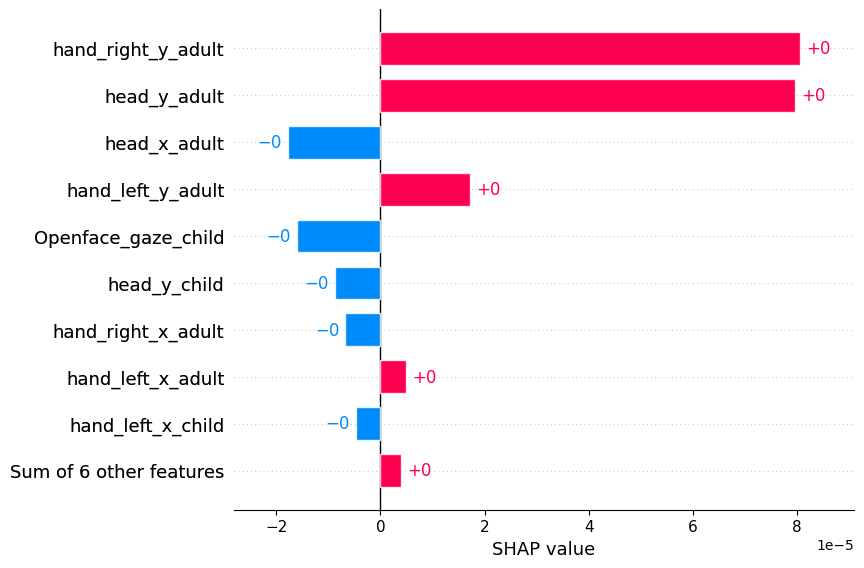

In [81]:
shap.plots.bar(shap_values[0])

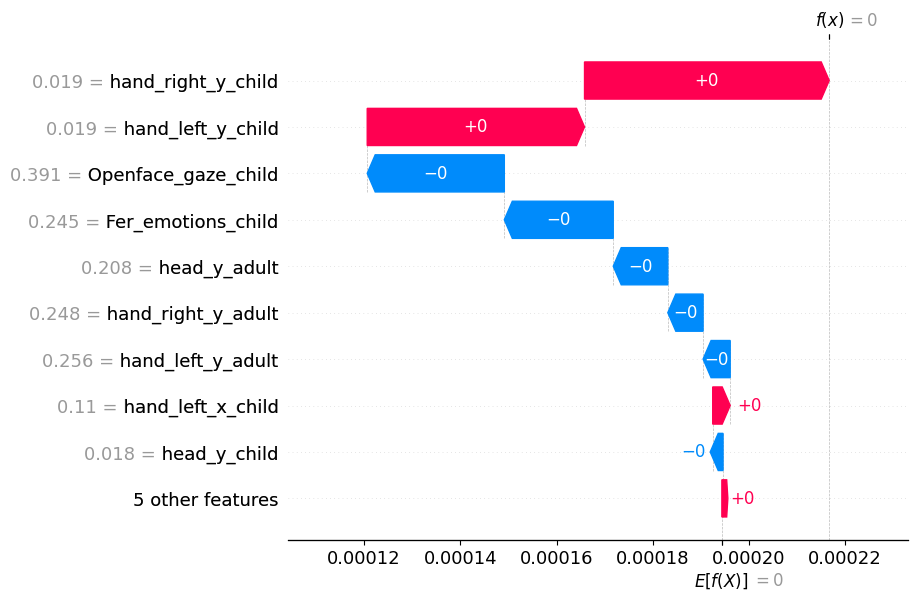

In [26]:
shap.plots.waterfall(shap_values[0])

In [82]:
shap.initjs()
shap.plots.force(shap_values[0])

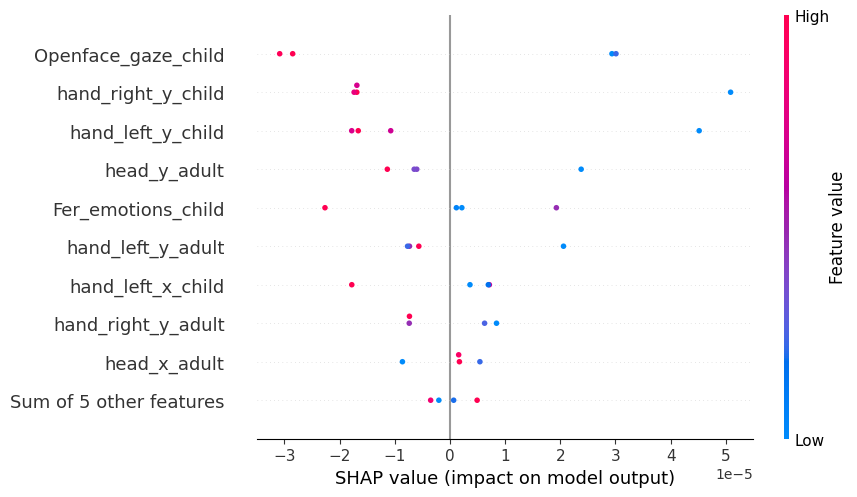

In [28]:
shap.plots.beeswarm(shap_values)

### FOR Total_video_red_head

In [52]:
# %% Imports
from utils import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\MJAR0016\Desktop\data_4_SHAP.csv')
df.head()

,Video_Name,Type,Openface_gaze_child,Fer_emotions_child,hand_left_x_adult,hand_left_y_adult,hand_right_x_adult,hand_right_y_adult,head_x_adult,head_y_adult,hand_left_x_child,hand_left_y_child,hand_right_x_child,hand_right_y_child,head_x_child,head_y_child,Total_video_red_body,Total_video_red_head
0,2023_CFLH,Control,0.367,0.001799,0.127726,0.048561,0.122745,0.050315,0.099885,0.034279,0.200317,0.096824,0.082856,0.097622,0.182887,0.057123,0.000000,0.000000
1,2025_SRF,Control,0.374,0.203160,0.247773,0.211057,0.218768,0.214073,0.198482,0.149894,0.049753,0.028589,0.037262,0.029972,0.048221,0.026176,0.000099,0.000000
2,2048_VMY,Control,0.485,0.007679,0.149614,0.108114,0.176780,0.087354,0.124731,0.054382,0.153328,0.101382,0.054481,0.105798,0.130008,0.073737,0.000192,0.000048
3,2053_HCK,Control,0.377,0.002789,0.067173,0.034553,0.072553,0.032087,0.062592,0.033870,0.115682,0.067241,0.088655,0.070538,0.116464,0.054508,0.000000,0.000000
4,2055_CP,Control,0.329,0.022569,0.215708,0.257767,0.234966,0.258505,0.185188,0.198978,0.197849,0.152850,0.095717,0.149772,0.166600,0.102052,0.000000,0.000000


In [53]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

with open(r'C:\Users\MJAR0016\Desktop\data_4_SHAP.csv') as f:
 X = pd.read_csv(f,usecols=['Openface_gaze_child' ,'Fer_emotions_child', 'hand_left_x_adult', 'hand_left_y_adult','hand_right_x_adult','hand_right_y_adult','head_x_adult','head_y_adult','hand_left_x_child','hand_left_y_child','hand_right_x_child','hand_right_y_child','head_x_child','head_y_child'])
f.close()
X.head(10)
y = df['Total_video_red_head']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
X.head()

,Openface_gaze_child,Fer_emotions_child,hand_left_x_adult,hand_left_y_adult,hand_right_x_adult,hand_right_y_adult,head_x_adult,head_y_adult,hand_left_x_child,hand_left_y_child,hand_right_x_child,hand_right_y_child,head_x_child,head_y_child
0,0.367,0.001799,0.127726,0.048561,0.122745,0.050315,0.099885,0.034279,0.200317,0.096824,0.082856,0.097622,0.182887,0.057123
1,0.374,0.203160,0.247773,0.211057,0.218768,0.214073,0.198482,0.149894,0.049753,0.028589,0.037262,0.029972,0.048221,0.026176
2,0.485,0.007679,0.149614,0.108114,0.176780,0.087354,0.124731,0.054382,0.153328,0.101382,0.054481,0.105798,0.130008,0.073737
3,0.377,0.002789,0.067173,0.034553,0.072553,0.032087,0.062592,0.033870,0.115682,0.067241,0.088655,0.070538,0.116464,0.054508
4,0.329,0.022569,0.215708,0.257767,0.234966,0.258505,0.185188,0.198978,0.197849,0.152850,0.095717,0.149772,0.166600,0.102052


In [54]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

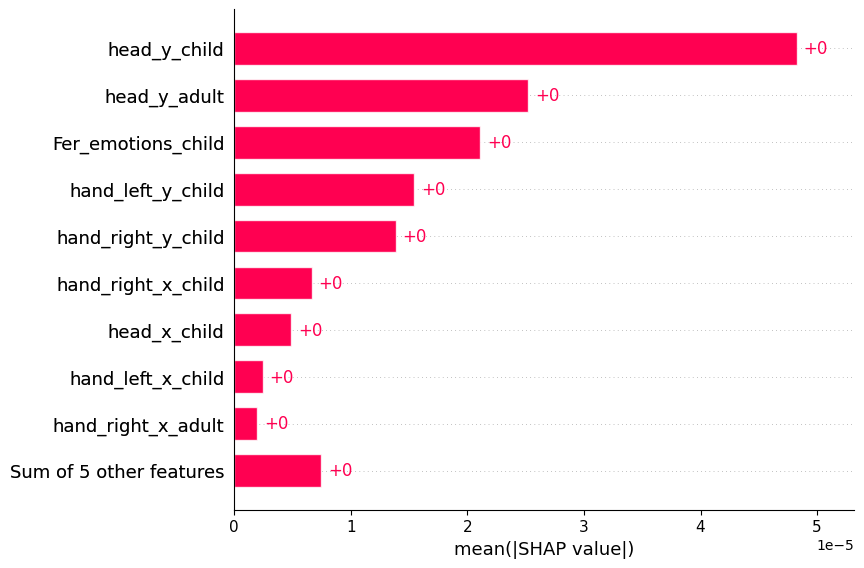

In [55]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


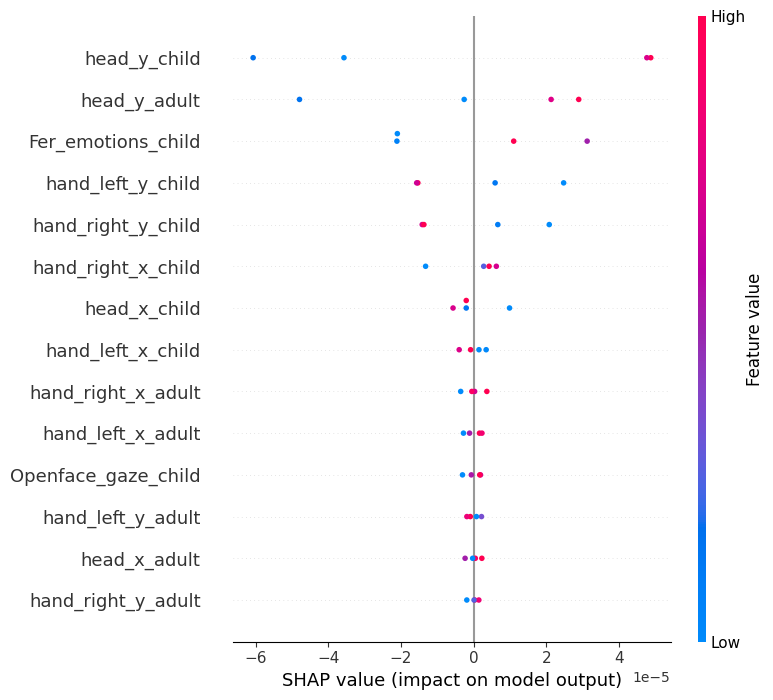

In [56]:
shap.summary_plot(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


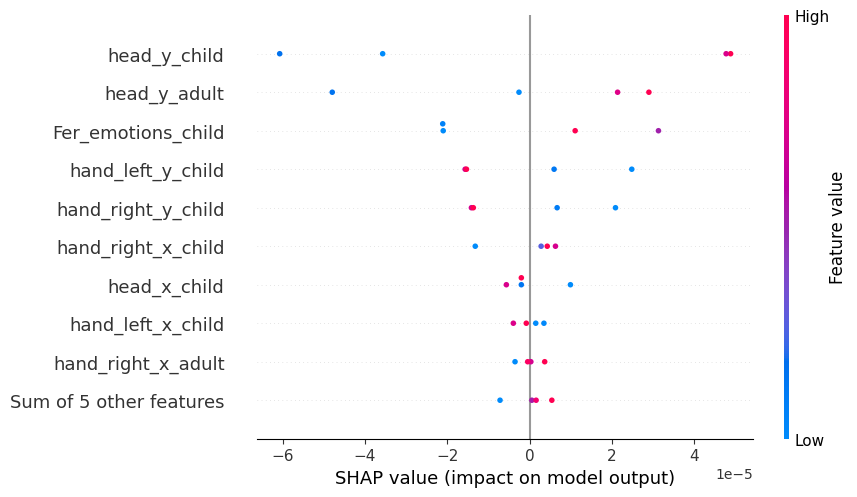

In [57]:
shap.plots.beeswarm(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


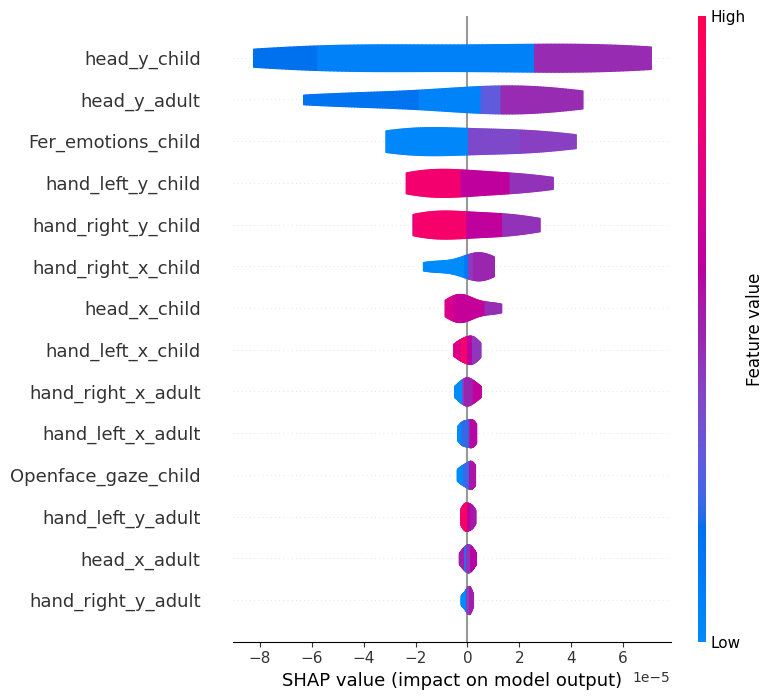

In [58]:
shap.summary_plot(shap_values, plot_type='violin')

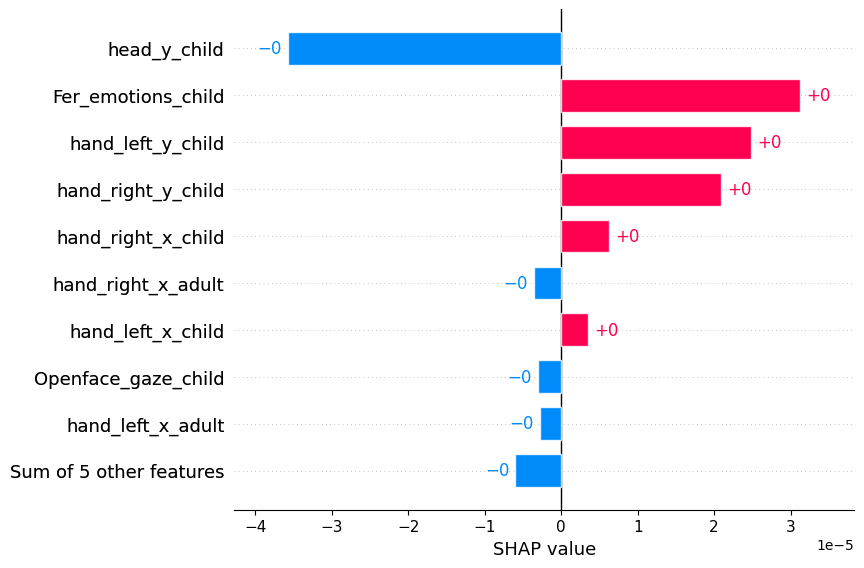

In [59]:
shap.plots.bar(shap_values[0])

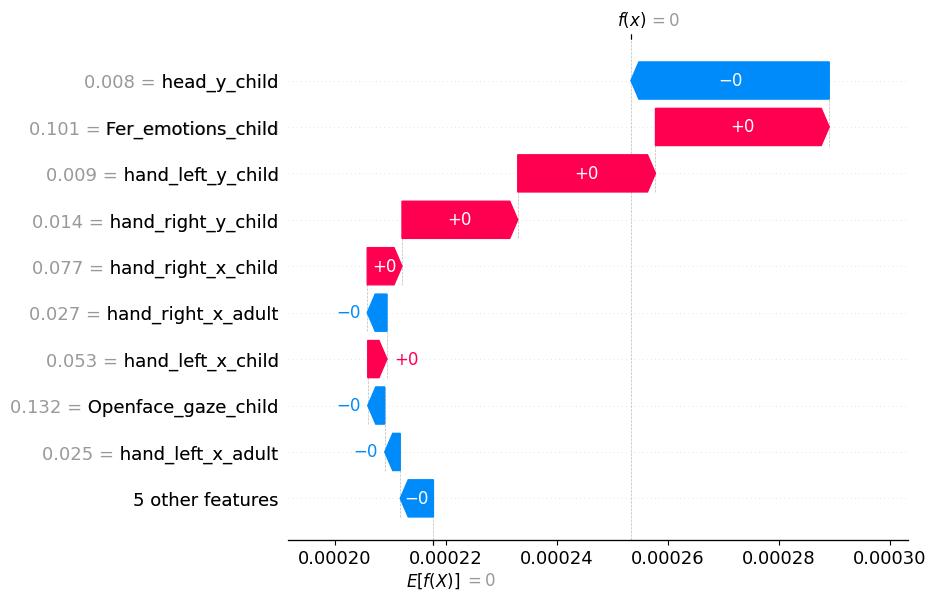

In [60]:
shap.plots.waterfall(shap_values[0])

In [61]:
shap.initjs()
shap.plots.force(shap_values[0])